# Exploring Natural Language Processing (NLP) and Generative AI

## Introduction
This week, we will examine two fascinating areas of artificial intelligence: **Natural Language Processing (NLP)** and **Generative AI**. NLP focuses on enabling machines to understand and interpret human language, while Generative AI, especially models like GPT, enables machines to generate coherent and meaningful text. We will explore key techniques in NLP using Python's `NLTK` library and then explore how to use and fine-tune **GPT-2**, a popular generative model.

---

## Learning Objectives
By the end of this session, you will be able to:
- Understand the basics of NLP and its applications.
- Perform essential text preprocessing tasks using NLTK such as tokenization, stop word removal, stemming, and lemmatization.
- Use the Bag of Words model to convert text into numerical representations.
- Get introduced to **Generative AI** models and learn how to use GPT-2 for text generation.
- Fine-tune a GPT-2 model on a custom dataset to generate domain-specific text.

---

## Section 1: Natural Language Processing (NLP)
Run this in the terminal: pip install nltk

In [8]:
import nltk
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [9]:
# Sample text
text = "Natural Language Processing is a field of Artificial Intelligence. It enables computers to understand human language."


### 1.1 Tokenization
**Tokenization** is the process of breaking down text into individual components such as words or sentences.

#### Code Example: Tokenization using NLTK

In [11]:
# Tokenize the text
nltk.download('punkt_tab', quiet=True)

True

In [20]:
from nltk.tokenize import word_tokenize, sent_tokenize

In [21]:
# Word Tokenization
word_tokens = word_tokenize(text)
print("Word Tokens:", word_tokens)

# Sentence Tokenization
sent_tokens = sent_tokenize(text)
print("Sentence Tokens:", sent_tokens)


Word Tokens: ['Natural', 'Language', 'Processing', 'is', 'a', 'field', 'of', 'Artificial', 'Intelligence', '.', 'It', 'enables', 'computers', 'to', 'understand', 'human', 'language', '.']
Sentence Tokens: ['Natural Language Processing is a field of Artificial Intelligence.', 'It enables computers to understand human language.']


### 1.2 Stop Word Removal
**Stop words** are common words like "the", "is", and "in" that may not carry significant meaning and can be removed from the text to focus on the important content.

#### Code Example: Removing Stop Words

In [12]:
nltk.download('stopwords', quiet=True)

True

In [23]:
from nltk.corpus import stopwords

In [24]:
# Define stop words
stop_words = set(stopwords.words('english'))

In [ ]:
print("Stop words in English are: \n")
print(stop_words)

Stop words in English are: 

{'shouldn', 'all', 'an', 'so', 've', 'nor', 'on', 'her', 'were', 'doesn', 'have', 'to', 'my', 'itself', 'did', 'both', 'of', 're', 'that', 'didn', 'this', "isn't", 'while', 'most', "aren't", 'm', 'but', 'out', 'couldn', 'myself', 'hasn', 'theirs', 'should', 'had', 'over', 'yourselves', 'through', "couldn't", 'shan', 'after', 'few', 'no', "don't", 'can', 'wasn', 'what', 'above', "mustn't", 'than', 'because', 'me', 'their', 'again', 'are', "you've", 'a', 'very', 'ourselves', 'not', 'when', 'then', 'isn', 'some', 'she', 'i', 'it', 'weren', 'with', 'being', 'mightn', 'for', 'below', 'd', 'only', "won't", 'or', 'don', 'too', "doesn't", "that'll", "hadn't", 'doing', 'mustn', 'won', 'is', 't', 'ma', 'its', 'the', 'off', 'further', "wouldn't", 'him', 'aren', 'where', 'them', 'any', 'at', "wasn't", 'as', 'during', 'will', "you'll", 'yourself', 'needn', 'in', 'here', "should've", 'having', 'until', 'who', 'by', 'wouldn', 'do', 'whom', 'you', 'now', 'has', 'between', 

In [25]:
# Filter out stop words from word tokens
filtered_words = [word for word in word_tokens if word.lower() not in stop_words]
print("Filtered Words:", filtered_words)

Filtered Words: ['Natural', 'Language', 'Processing', 'field', 'Artificial', 'Intelligence', '.', 'enables', 'computers', 'understand', 'human', 'language', '.']


### 1.3 Stemming and Lemmatization
Stemming is the process of reducing words to their base form, while Lemmatization ensures that the reduced form is a valid word.

#### Code Example: Stemming and Lemmatization

In [13]:
from nltk.stem import PorterStemmer, WordNetLemmatizer
nltk.download('wordnet', quiet=True)

True

In [29]:
# Initialize stemmer and lemmatizer
ps = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [30]:
# Stemming
stemmed_words = [ps.stem(word) for word in filtered_words]
print("Stemmed Words:", stemmed_words)

Stemmed Words: ['natur', 'languag', 'process', 'field', 'artifici', 'intellig', '.', 'enabl', 'comput', 'understand', 'human', 'languag', '.']


In [31]:
# Lemmatization
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]
print("Lemmatized Words:", lemmatized_words)

Lemmatized Words: ['Natural', 'Language', 'Processing', 'field', 'Artificial', 'Intelligence', '.', 'enables', 'computer', 'understand', 'human', 'language', '.']


### 1.4. Part of Speech (POS) Tagging
**Part of Speech (POS) tagging** involves labeling words in a sentence as nouns, verbs, adjectives, etc., based on their context and definition.

#### Code Example: POS Tagging

In [14]:
nltk.download('averaged_perceptron_tagger_eng', quiet=True)

True

In [36]:
from nltk import pos_tag

In [38]:
pos_tags = pos_tag(word_tokens)
print("POS Tags:", pos_tags)

POS Tags: [('Natural', 'JJ'), ('Language', 'NNP'), ('Processing', 'NNP'), ('is', 'VBZ'), ('a', 'DT'), ('field', 'NN'), ('of', 'IN'), ('Artificial', 'JJ'), ('Intelligence', 'NNP'), ('.', '.'), ('It', 'PRP'), ('enables', 'VBZ'), ('computers', 'NNS'), ('to', 'TO'), ('understand', 'VB'), ('human', 'JJ'), ('language', 'NN'), ('.', '.')]


### 1.5. Frequency Distribution
**Frequency distribution** is a statistical technique that shows how often different values occur in a dataset.

#### Code Example: Frequency Distribution

In [39]:
from nltk.probability import FreqDist

fd = FreqDist(word_tokens)
print("Frequency Distribution:", fd)

Frequency Distribution: <FreqDist with 17 samples and 18 outcomes>


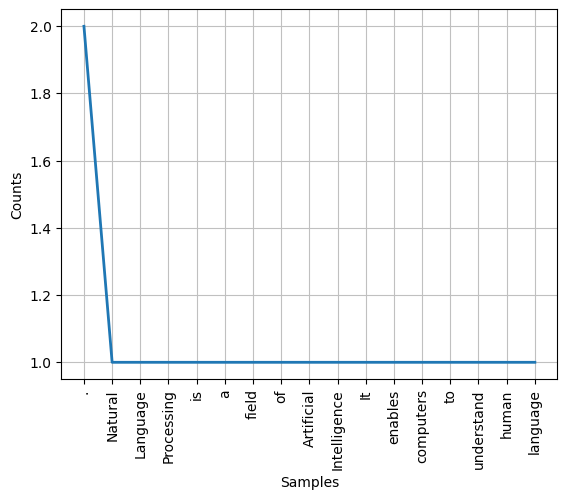

In [40]:
import matplotlib.pyplot as plt

fd.plot(30, cumulative=False)
plt.show()

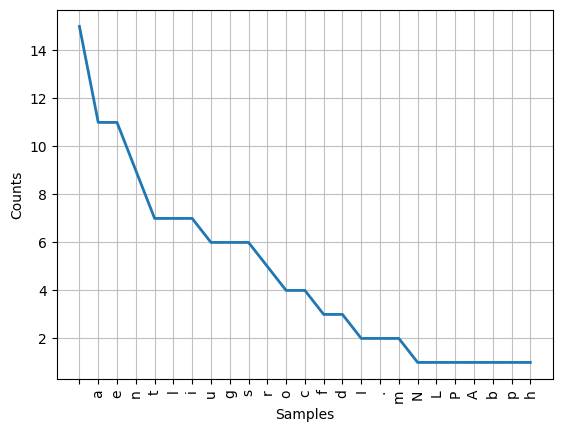

In [42]:
fd_alpha = FreqDist(text)
fd_alpha.plot(30, cumulative=False)
plt.show()

### 1.6. Bag of Words Model
The **Bag of Words (BoW)** model is used to convert text data into numerical form that can be used in machine learning models.

#### Code Example: Bag of Words Model using CountVectorizer

In [43]:
from sklearn.feature_extraction.text import CountVectorizer

# Sample corpus
corpus = ["NLP is fun", "Learning machine learning is great", "AI and NLP are the future"]


In [44]:
# Initialize count vectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

In [45]:
# Convert to array
print("Bag of Words Representation:\n", X.toarray())

Bag of Words Representation:
 [[0 0 0 1 0 0 1 0 0 1 0]
 [0 0 0 0 0 1 1 2 1 0 0]
 [1 1 1 0 1 0 0 0 0 1 1]]


In [46]:
# Display the feature names
print("Feature Names:", vectorizer.get_feature_names_out())

Feature Names: ['ai' 'and' 'are' 'fun' 'future' 'great' 'is' 'learning' 'machine' 'nlp'
 'the']


## Section 2: Introduction to Generative AI Models
### 2.1. What is Generative AI?
**Generative AI** models can generate new data, such as images, music, or text, based on patterns learned from existing data. These models can be used for creative tasks like text generation, image synthesis, and more.

Neural network works on the core of generative AI. It is a network of nodes that are interconnected and work together to process complex data inputs and generate outputs. Generative AI models like GPT-2 use neural networks to generate human-like text.

### Career Impacts of Generative AI
Generative AI has a wide range of applications in various industries, including:
- **Content Creation**: Generating text, images, and videos.
- **Chatbots and Virtual Assistants**: Creating conversational agents.
- **Art and Design**: Generating creative content.
- **Healthcare**: Analyzing medical data and generating reports.
- **Finance**: Analyzing financial data and generating insights.

### Generative AI vs. NLP
While NLP focuses on understanding and interpreting human language, Generative AI models like GPT-2 can generate human-like text based on patterns learned from large datasets.


### 2.2. Deep Dive into Generative AI Models
**Generative Pre-trained Transformer 2 (GPT-2)** is a powerful generative AI model developed by OpenAI. It is based on a transformer architecture and has been trained on a large corpus of text data to generate coherent and contextually relevant text.

Transformer-based models are scalable and can capture long-range dependencies in text data, making them suitable for a wide range of natural language processing tasks.

### 2.3. Keeping Up with the Latest in Generative AI
Generative AI is a rapidly evolving field, with new models and techniques being developed regularly. Staying up-to-date with the latest research and advancements in generative AI can help you leverage these technologies for various applications.

- Join online communities and forums related to generative AI.
- Follow research papers and publications in the field.
- Experiment with different generative AI models and frameworks.
- Collaborate with other AI enthusiasts and researchers to explore new ideas and projects.
- Attend conferences, workshops, and webinars on generative AI.
- Participate in hackathons and competitions to apply generative AI techniques to real-world problems.
- LinkedIn Learning and Coursera offer courses on generative AI and NLP.

### 2.4. Using GPT-2 for Text Generation
GPT-2 is a versatile model that can be fine-tuned on custom datasets to generate domain-specific text. By providing GPT-2 with relevant training data, you can create a text generation model that produces contextually relevant and coherent text in a specific domain.

Huggingface Transformers library provides easy-to-use interfaces for working with GPT-2 and other transformer-based models.

#### Code Example: Using GPT-2 for Text Generation
pip install transformers
pip install ipywidgets

GPT2LMHeadModel requires the PyTorch library but it was not found in your environment. Checkout the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.
pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118


In [5]:
import warnings
from transformers import GPT2LMHeadModel, GPT2Tokenizer

warnings.filterwarnings("ignore", category=FutureWarning)

# Load the tokenizer and pre-trained GPT-2 model
model_name = 'gpt2'  # or 'gpt2-medium', 'gpt2-large', etc.
tokenizer = GPT2Tokenizer.from_pretrained(model_name)
model = GPT2LMHeadModel.from_pretrained(model_name)

In [6]:
tokenizer.pad_token_id = tokenizer.eos_token_id

# Input text
input_text = "Artificial Intelligence is"

# Tokenize and encode input text
inputs = tokenizer.encode(input_text, return_tensors="pt")

attention_mask = inputs.ne(tokenizer.pad_token_id).long()

# Generate text using GPT-2
output = model.generate(inputs, max_length=100, no_repeat_ngram_size=2, num_return_sequences=1, pad_token_id = tokenizer.eos_token_id)
generated_text = tokenizer.decode(output[0], skip_special_tokens=True)

print("Generated Text:\n", generated_text)


Generated Text:
 Artificial Intelligence is a new field of research that has been gaining traction in recent years. It is now being used to develop new technologies for the production of artificial intelligence.

The research is being conducted by the University of California, Berkeley, and the National Institute of Standards and Technology (NIST).
. The research was funded by a grant from the NIST.


In [7]:
from transformers import pipeline

# Load the sentiment analysis pipeline
sentiment_analysis = pipeline("sentiment-analysis")

# Analyze sentiment
text = "I love the new iPhone"
result = sentiment_analysis(text)
print("Sentiment Analysis Result:", result)

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


Sentiment Analysis Result: [{'label': 'POSITIVE', 'score': 0.9997734427452087}]


## Conclusion

In this week's session, we explored the fundamentals of Natural Language Processing (NLP), covering essential tasks like tokenization, stop word removal, stemming, lemmatization, and the Bag of Words model. We also introduced Generative AI using GPT-2, demonstrating how to generate text. You can explore how to fine-tune the model on a custom dataset.

By the end of this week, you should have a solid understanding of how to process and analyze textual data using NLP techniques and how to generate new text using GPT-2. This knowledge is key to building advanced AI applications in domains like chatbots, text summarization, and content generation.